# **1. Perkenalan Dataset**


Dataset diambil dari kaggle, salah satu platform yang berfokus pada data science dan machine learning https://www.kaggle.com/code/daanishmuzaffar/bank-fraud-detection-and-transaction-analysis/notebook#Fraud-Detection-Methods

# **2. Import Library**

In [36]:
#Importing Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
!pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

# **3. Memuat Dataset**

In [37]:
data = pd.read_csv('bank_transactions_data_2.csv')
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**



In [38]:
#Memahami jumlah baris dan kolom
print(f"Jumlah baris: {data.shape[0]}")
print(f"Jumlah kolom: {data.shape[1]}")

Jumlah baris: 2512
Jumlah kolom: 16


In [39]:
#Memeriksa tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Beberapa kolom memiliki tipe data yang tidak sesuai, seperti kolom *TransactionDate* dan *PreviousTransactionDate* yang bertipe data "object", padahal seharusnya bertipe "datetime". Selain itu, kolom *transactionType* dan *channel* sebaiknya diubah menjadi tipe data "category", sedangkan kolom *Customer Age*, *Transaction Duration*, dan *Login Attempts* sebaiknya bertipe data "integer".

In [40]:
#Mengidentifikasi Missing Values
print("\Jumlah missing values:\n", data.isnull().sum())

# Persentase data yang hilang
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPersentase missing values:\n", missing_percentage)

\Jumlah missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Persentase missing values:
 TransactionID              0.0
AccountID                  0.0
TransactionAmount          0.0
TransactionDate            0.0
TransactionType            0.0
Location                   0.0
DeviceID                   0.0
IP Address                 0.0
MerchantID                 0.0
Channel                    0.0
CustomerAge                0.0
CustomerOccupation         0.0
TransactionDuration        0.0
LoginAttempts              0.0
AccountBalance             0.0
Prev

In [41]:
# Memeriksa data duplikat
print(f"Jumlah data duplikat sebelum dihapus: {data.duplicated().sum()}")

Jumlah data duplikat sebelum dihapus: 0



Statistik deskriptif untuk variabel numerik:
        TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


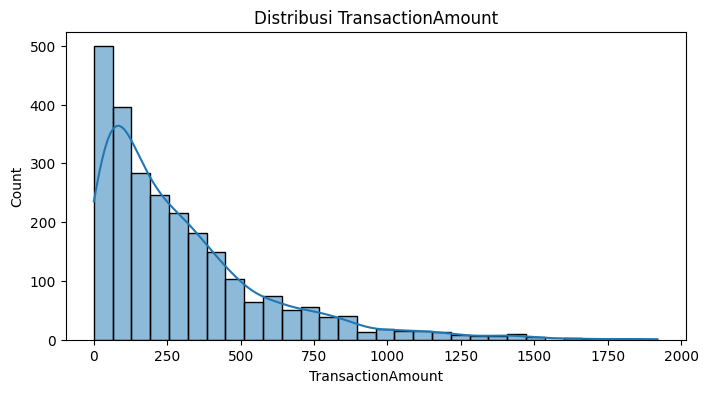

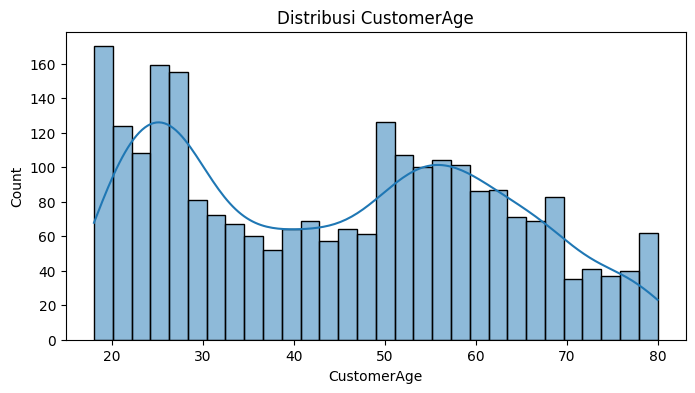

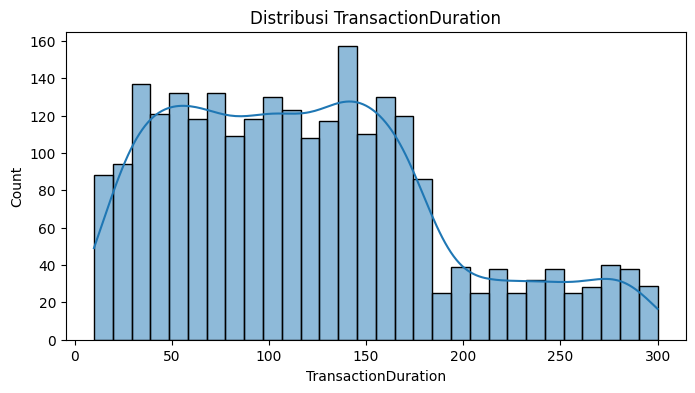

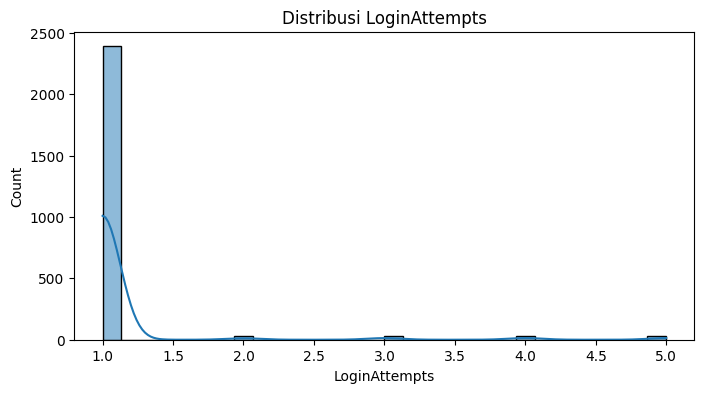

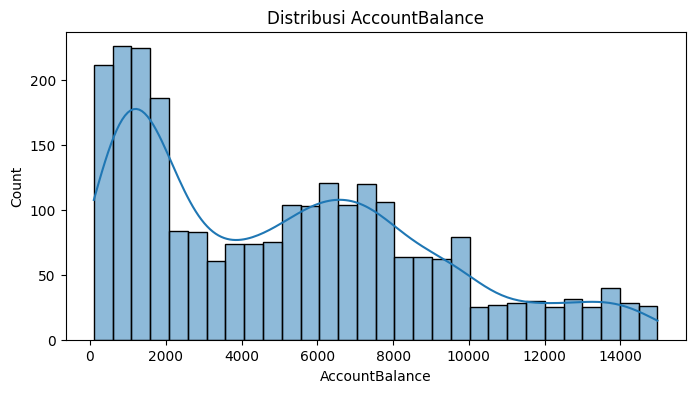

In [42]:
# Analisis distribusi statistik deskriptif untuk variabel numerik
print("\nStatistik deskriptif untuk variabel numerik:\n", data.describe())

# Visualisasi distribusi variabel numerik
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.show()

Analisis parameter statistik diatas menunjukkan bahwa
- Distribusi pada transactionAmmount tidak terdistribusi normal karena data cenderung memiliki distribusi right skewness.
- Dsitribusi data pada CustomerAge, TransactionDuration dan AccountBalance mengalami beberapa lonjakan di tiap distirbusinya

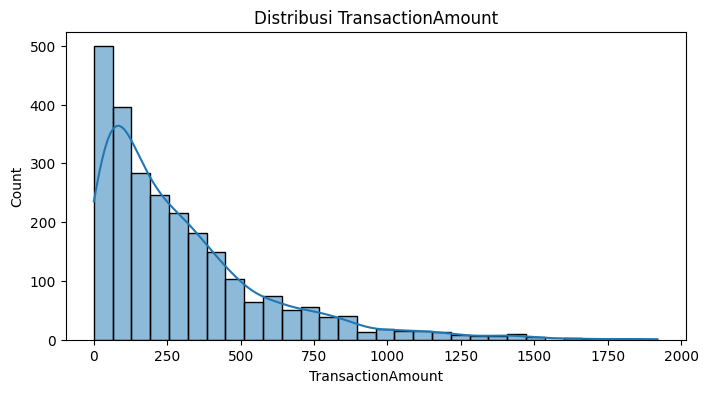

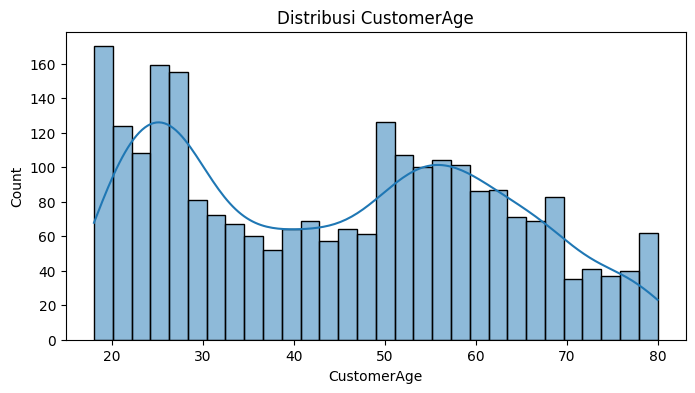

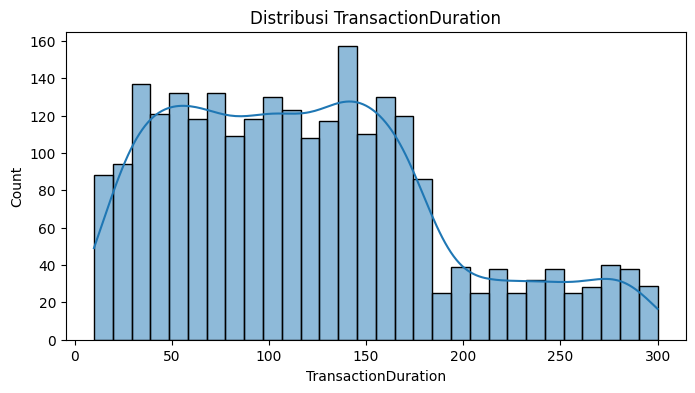

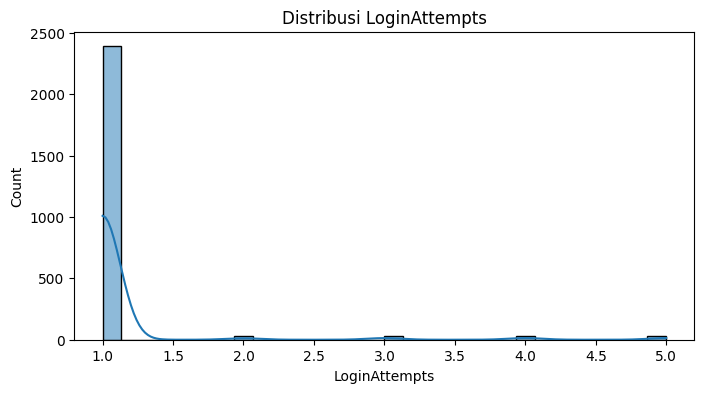

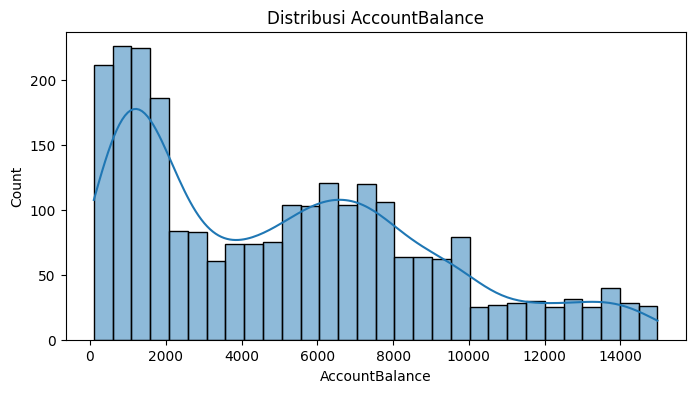

In [43]:
# Visualisasi distribusi variabel numerik
numerical_cols = data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.show()

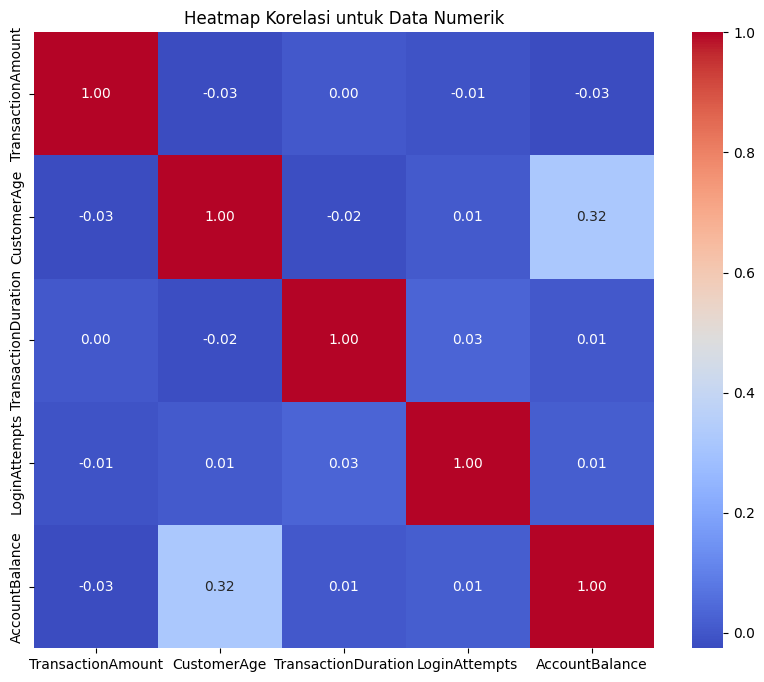

In [44]:
# Menghitung matriks korelasi untuk kolom numerik
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap Korelasi untuk Data Numerik")
plt.show()

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


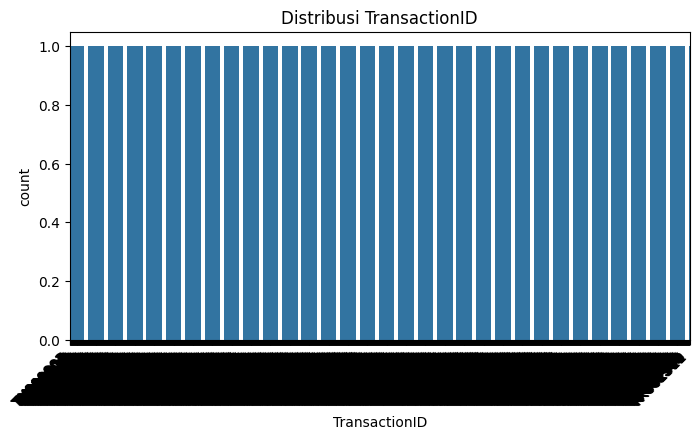

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


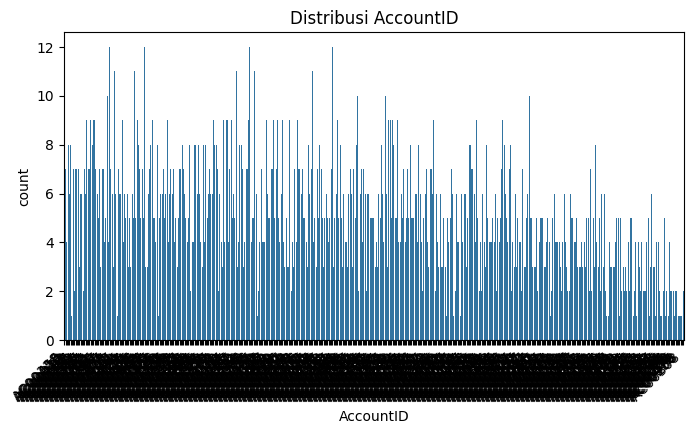

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


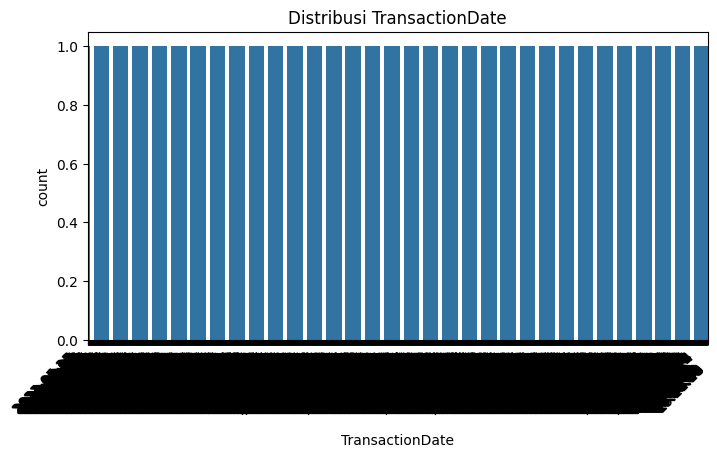

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


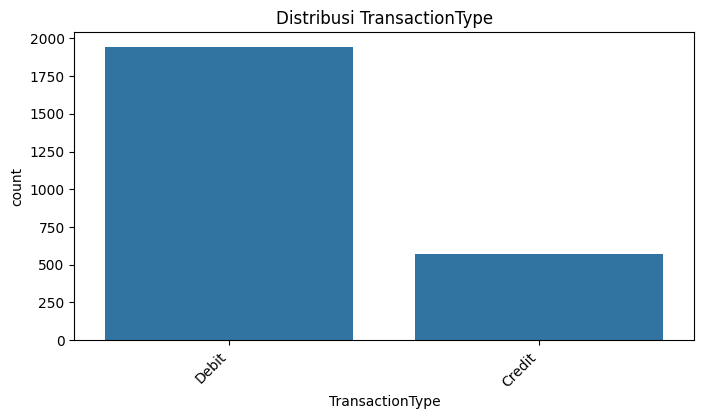

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


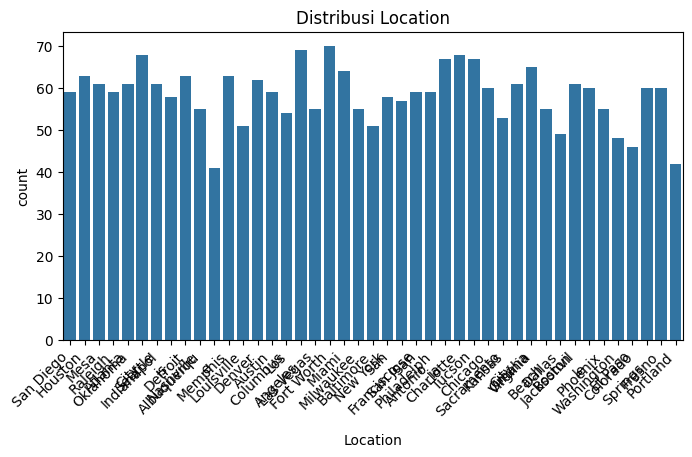

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


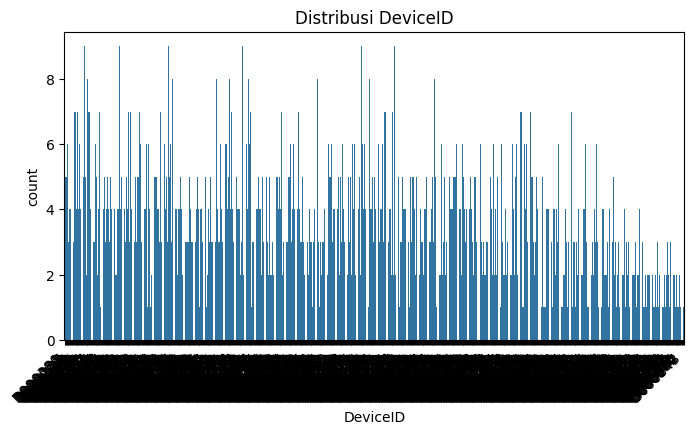

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


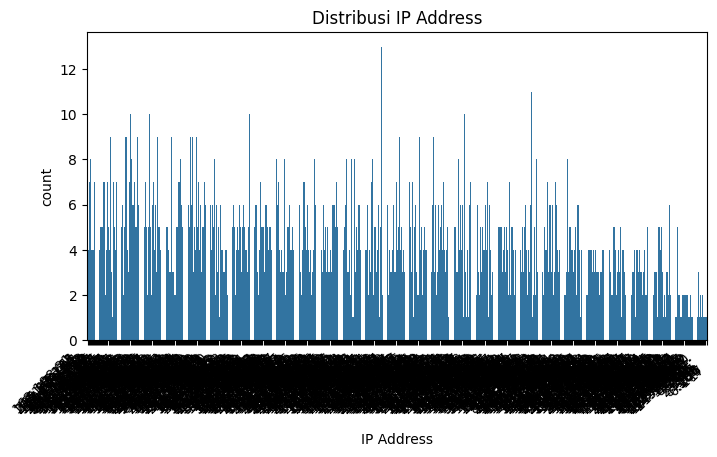

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


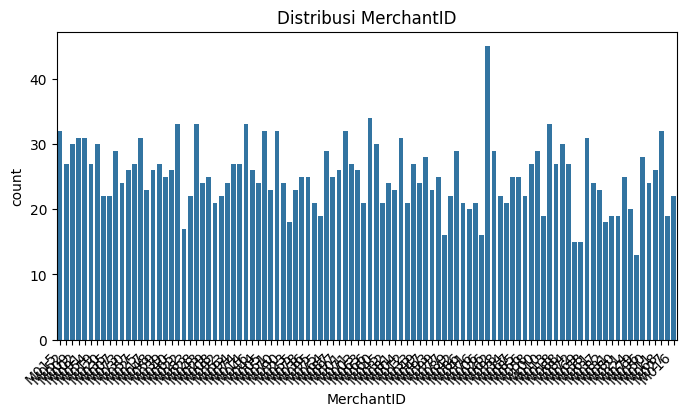

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


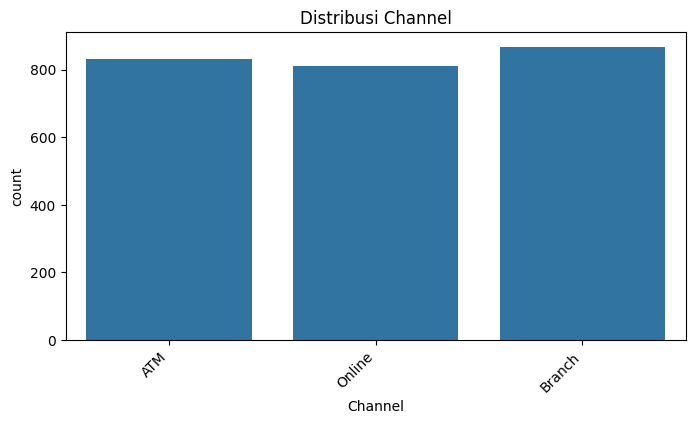

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


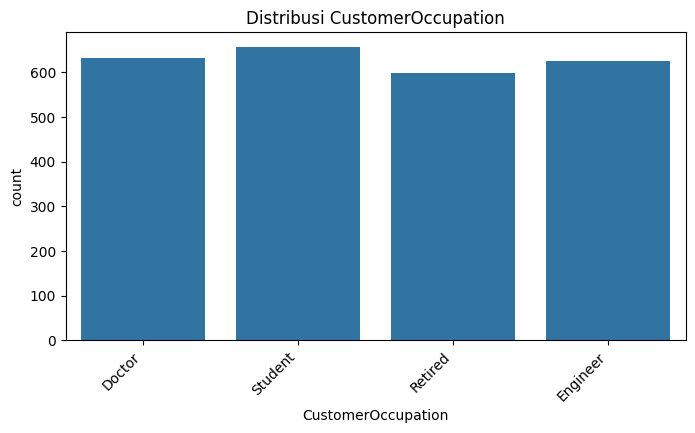

<ipython-input-45-950586625d3d>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels, rotation=45, ha='right')


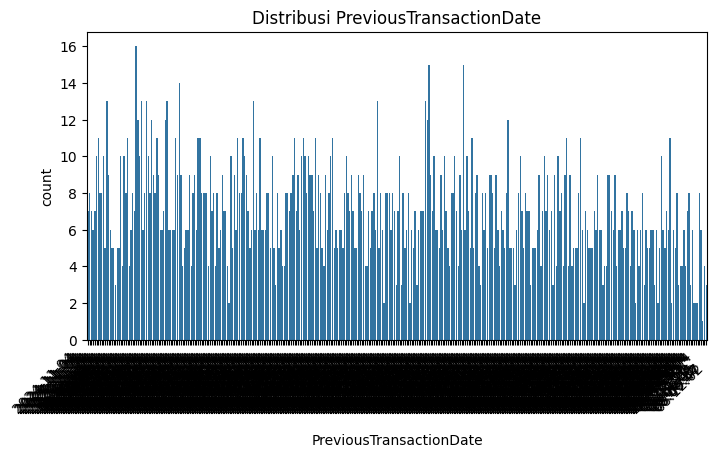

In [45]:
# Visualisasi data pada kolom kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f"Distribusi {col}")

    # Membungkus teks label agar rapi
    labels = [textwrap.fill(label.get_text(), width=10) for label in plt.gca().get_xticklabels()]
    plt.gca().set_xticklabels(labels, rotation=45, ha='right')

    plt.show()

Visualisasi di atas menunjukkan bahwa distribusi kolom TransactionID, TransactionDate, Channel, dan CustomerOccupation cenderung merata. Sementara itu, beberapa kolom lainnya menunjukkan distribusi yang tidak merata dengan adanya lonjakan pada beberapa titik.

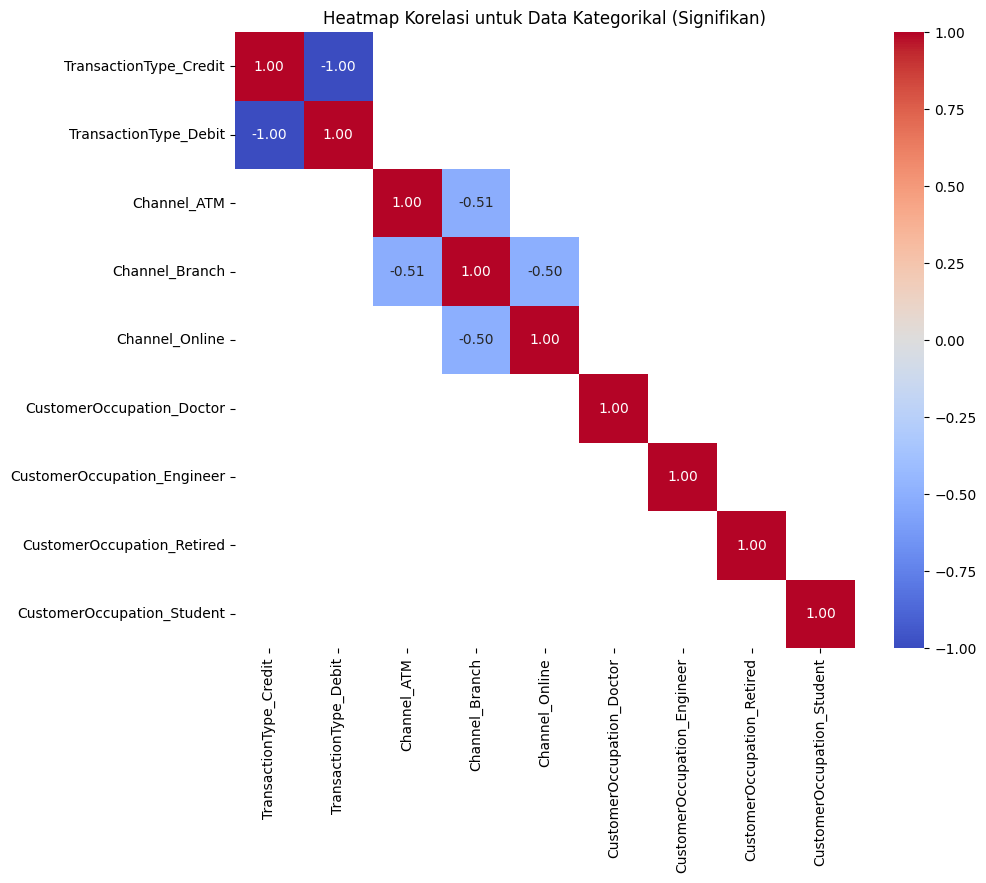

In [46]:
#Heatmap korelasi untuk antar variabel kategorikal
categorical_data = data.select_dtypes(include=['object'])

# Ubah ke dummy variables, tetapi hanya kolom dengan jumlah kategori <= N
max_categories = 10
filtered_categorical_data = categorical_data.loc[:, categorical_data.nunique() <= max_categories]
categorical_data_encoded = pd.get_dummies(filtered_categorical_data)

# Hitung matriks korelasi
correlation_matrix = categorical_data_encoded.corr()

# Filter hanya korelasi signifikan
threshold = 0.5
significant_corr = correlation_matrix[
    (correlation_matrix > threshold) | (correlation_matrix < -threshold)
]

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap Korelasi untuk Data Kategorikal (Signifikan)")
plt.show()

In [47]:
# Mengidentifikasi jumlah kategori pada kolom kategorikal
for col in categorical_cols:
    print(f"{col} memiliki {data[col].nunique()} kategori unik")

TransactionID memiliki 2512 kategori unik
AccountID memiliki 495 kategori unik
TransactionDate memiliki 2512 kategori unik
TransactionType memiliki 2 kategori unik
Location memiliki 43 kategori unik
DeviceID memiliki 681 kategori unik
IP Address memiliki 592 kategori unik
MerchantID memiliki 100 kategori unik
Channel memiliki 3 kategori unik
CustomerOccupation memiliki 4 kategori unik
PreviousTransactionDate memiliki 360 kategori unik


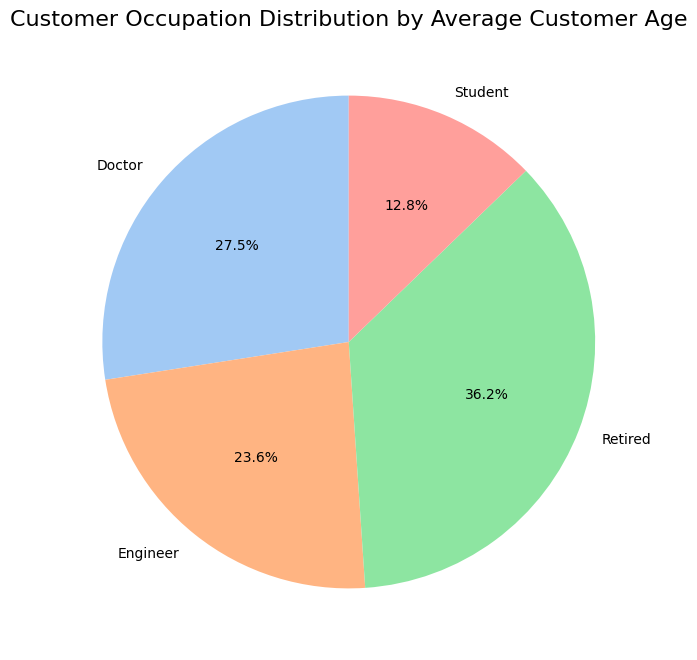

In [48]:
# Visualisasi Pie Chart untuk Customer Occupation berdasarkan rata-rata Customer Age
if 'CustomerOccupation' in data.columns and 'CustomerAge' in data.columns:
    plt.figure(figsize=(8, 8))
    mean_customer_age = data.groupby('CustomerOccupation')['CustomerAge'].mean().abs()
    mean_customer_age.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Customer Occupation Distribution by Average Customer Age', fontsize=16)
    plt.ylabel('')  # Menghapus label y default
    plt.show()

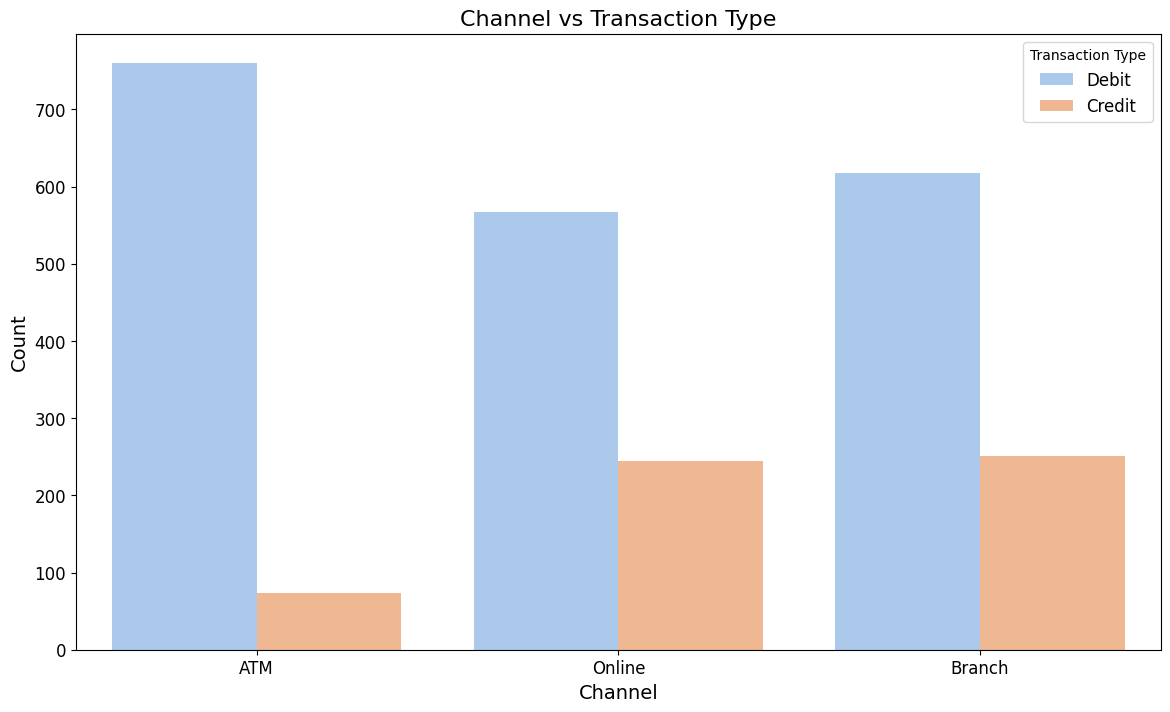

In [49]:
# Visualisasi Grafik Batang untuk Channel dan TransactionType
if 'Channel' in data.columns and 'TransactionType' in data.columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(x='Channel', hue='TransactionType', data=data, palette='pastel')
    plt.title('Channel vs Transaction Type', fontsize=16)
    plt.xlabel('Channel', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Transaction Type', fontsize=12)
    plt.show()

# **5. Data Preprocessing**

In [50]:
#Mengubah nama kolom IP Address ke IP_Address
data.rename(columns={'IP Address': 'IP_Address'}, inplace=True)

In [51]:
#Mengonversi tipe data TransactionType dan Channel menjadi kategori
data['TransactionType'] = data['TransactionType'].astype('category')
data['Channel'] = data['Channel'].astype('category')

#Mengonversi tipe data Customer Age, Transaction Duration, dan Login Attempts menjadi integer
data['CustomerAge'] = data['CustomerAge'].astype('int')
data['TransactionDuration'] = data['TransactionDuration'].astype('int')
data['LoginAttempts'] = data['LoginAttempts'].astype('int')

# Mengonversi kolom datetime dan membuat fitur baru
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['TransactionYear'] = data['TransactionDate'].dt.year
data['TransactionMonth'] = data['TransactionDate'].dt.month
data['TransactionDay'] = data['TransactionDate'].dt.day

In [52]:
# Mengisi missing values pada kolom numerik dengan median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Mengisi missing values pada kolom kategorikal dengan mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

print("\nJumlah missing values setelah penanganan:\n", data.isnull().sum())


Jumlah missing values setelah penanganan:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP_Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
TransactionYear            0
TransactionMonth           0
TransactionDay             0
dtype: int64


In [53]:
# Mengatasi data duplikat
data.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat setelah dihapus: {data.duplicated().sum()}")

Jumlah data duplikat setelah dihapus: 0


In [54]:
# Standarisasi kolom numerik
standardized_data = data.copy()

# Standarisasi hanya kolom numerik
scaler = StandardScaler()
numerical_cols = standardized_data.select_dtypes(include=['float64', 'int64']).columns
standardized_data[numerical_cols] = scaler.fit_transform(standardized_data[numerical_cols])

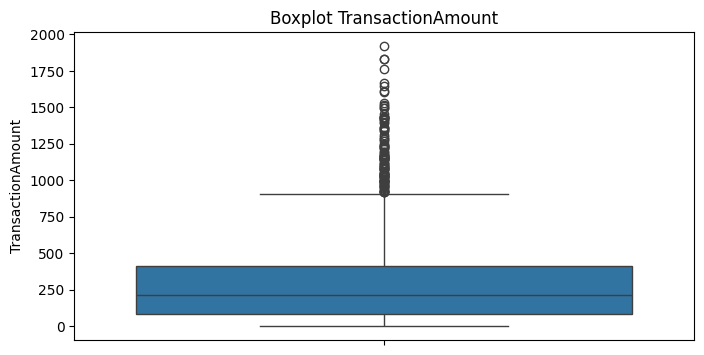

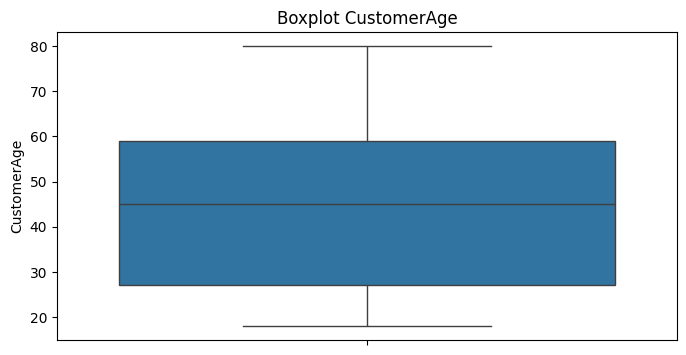

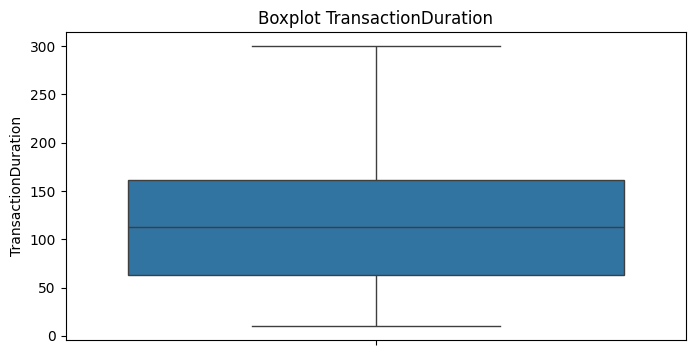

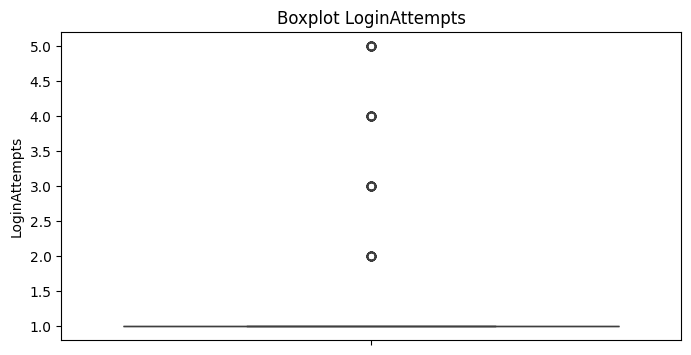

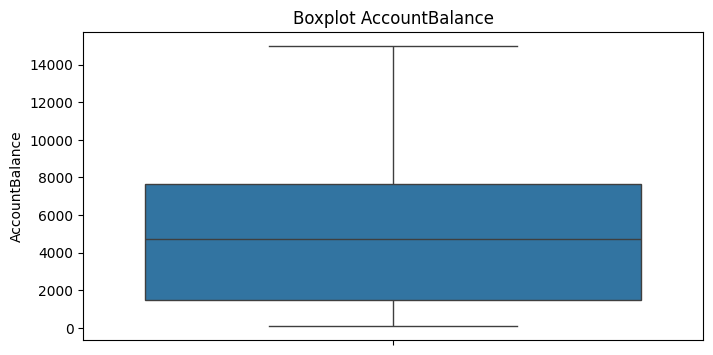

In [55]:
#Memeriksa kolom numerik dengan outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot {col}")
    plt.show()

In [56]:
# Metode IQR untuk menangani outliers pada kolom numerik
def remove_outliers(data, column):
    # Handle masked values
    data_column = data[column].dropna()

    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_indices = data_column[(data_column >= lower_bound) & (data_column <= upper_bound)].index
    return data.loc[filtered_indices]

data = remove_outliers(data, 'TransactionAmount')
data = remove_outliers(data, 'LoginAttempts')

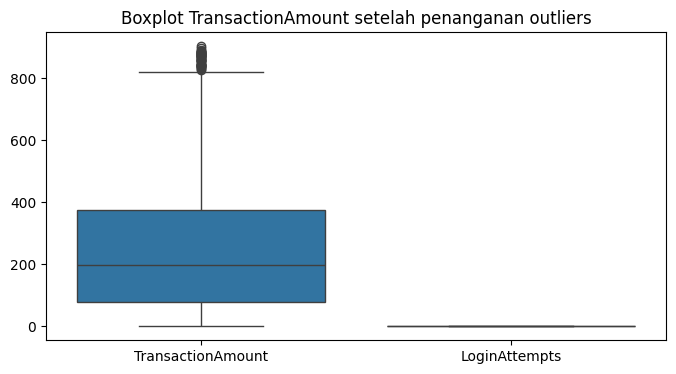

In [57]:
#Meninjau kolom TransactionAmount dan LoginAtempts setelah penanganan outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data[['TransactionAmount', 'LoginAttempts']])
plt.title("Boxplot TransactionAmount setelah penanganan outliers")
plt.show()

In [58]:
def handle_outliers_transactionamount(data, column='TransactionAmount', method='winsorize'):
    if method == 'winsorize':
        data[column] = winsorize(data[column], (0.05, 0.05))
    elif method == 'remove':
        z = np.abs(stats.zscore(data[column]))
        data = data[(z < 3)]
    else:
        print("Method tidak valid. Gunakan 'winsorize' atau 'remove'.")
    return data

data = handle_outliers_transactionamount(data, method='winsorize')

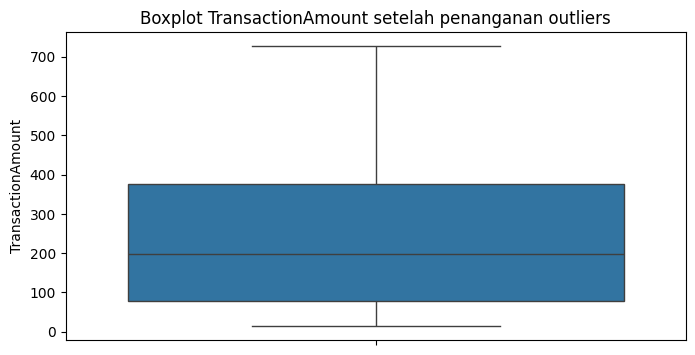

In [59]:
#Melihat kembali outliers pada TransactionAmount
plt.figure(figsize=(8, 4))
sns.boxplot(data['TransactionAmount'])
plt.title("Boxplot TransactionAmount setelah penanganan outliers")
plt.show()

TransactionAmount_Bins
Bin_1    1120
Bin_2     578
Bin_3     312
Bin_4     272
Name: count, dtype: int64


<ipython-input-60-9597fb83326f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionAmount_Bins', data=data, palette='pastel')


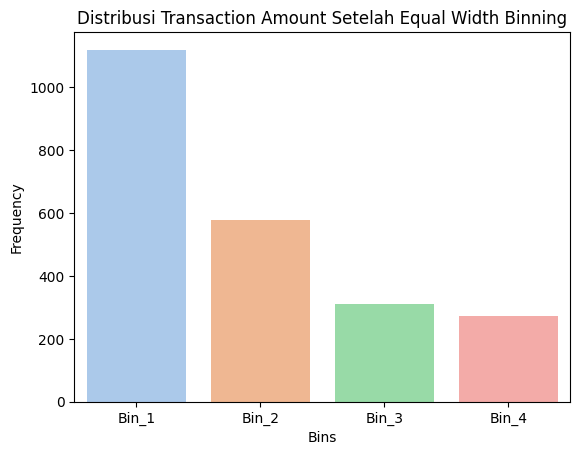

In [60]:
# Melakukan binning dengan equal width
num_bins = 4  # Jumlah bin yang diinginkan
data['TransactionAmount_Bins'] = pd.cut(
    data['TransactionAmount'],
    bins=num_bins,
    labels=[f'Bin_{i+1}' for i in range(num_bins)],
    include_lowest=True
)

# Menampilkan distribusi bin
print(data['TransactionAmount_Bins'].value_counts())

# Visualisasi distribusi bin
sns.countplot(x='TransactionAmount_Bins', data=data, palette='pastel')
plt.title('Distribusi Transaction Amount Setelah Equal Width Binning')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Encoding Variabel Kategorikal
# 1. Dapatkan daftar kategori unik untuk setiap kolom kategorikal
categories = [data[col].unique().tolist() for col in categorical_cols]

# 2. Buat OneHotEncoder dengan handle_unknown='ignore' dan categories
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', categories=categories)

# 3. Lakukan encoding
encoded_categorical = encoder.fit_transform(data[categorical_cols])

# 4. Dapatkan nama kolom baru dari encoder
encoded_categorical_cols = encoder.get_feature_names_out(categorical_cols)

# 5. Buat DataFrame dengan nama kolom baru
encoded_categorical = pd.DataFrame(encoded_categorical, columns=encoded_categorical_cols)

In [62]:
#Menggabungkan data numerik dan kategorikal
final_data = pd.concat([standardized_data[numerical_cols], encoded_categorical], axis=1)
final_data.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionID_TX000001,TransactionID_TX000002,TransactionID_TX000003,TransactionID_TX000004,TransactionID_TX000005,...,PreviousTransactionDate_2024-11-04 08:11:26,PreviousTransactionDate_2024-11-04 08:09:50,PreviousTransactionDate_2024-11-04 08:06:55,PreviousTransactionDate_2024-11-04 08:08:41,PreviousTransactionDate_2024-11-04 08:10:22,PreviousTransactionDate_2024-11-04 08:06:57,PreviousTransactionDate_2024-11-04 08:07:33,PreviousTransactionDate_2024-11-04 08:09:47,PreviousTransactionDate_2024-11-04 08:07:14,PreviousTransactionDate_2024-11-04 08:12:02
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.269440,1.311287,0.305314,-0.206794,2.216472,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [63]:
#Menggunakan data yang sudah di normalisasi
scaled_data_numeric = final_data.select_dtypes(include=['float64', 'int64'])

#Memilih fitur numerik untuk clustering
selected_numerical_features = ['CustomerAge', 'AccountBalance', 'TransactionAmount']
numerical_data = scaled_data_numeric[selected_numerical_features] # Changed to scaled_data_numeric

#Memilih fitur kategorikal
selected_categorical_features = [col for col in final_data.columns if col not in selected_numerical_features]
categorical_data = final_data[selected_categorical_features]

# 3. Gabungkan data numerik dan kategorikal
combined_data = pd.concat([numerical_data, categorical_data], axis=1)

# 5. Lakukan clustering
n_clusters = 3  # Tentukan jumlah cluster
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Option 2: Impute NaN values with the mean of each column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median'
final_data_cleaned = pd.DataFrame(imputer.fit_transform(final_data), columns=final_data.columns)

cluster_labels = kmeans.fit_predict(final_data_cleaned)  # Use the cleaned data

## **b. Evaluasi Model Clustering**

Evaluating Elbow Method...


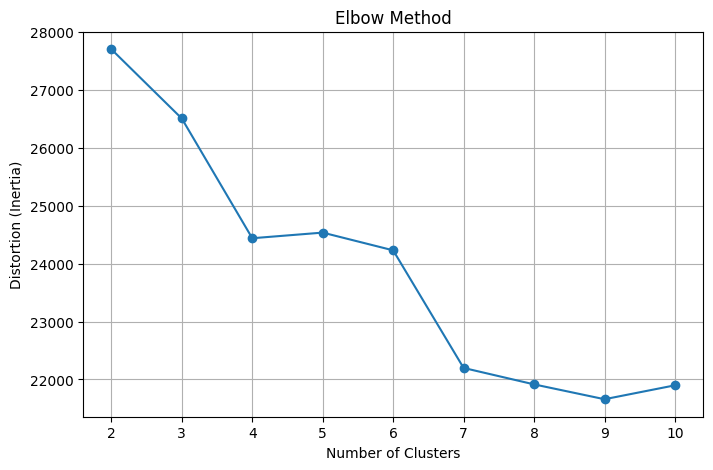

Evaluating Silhouette Score...


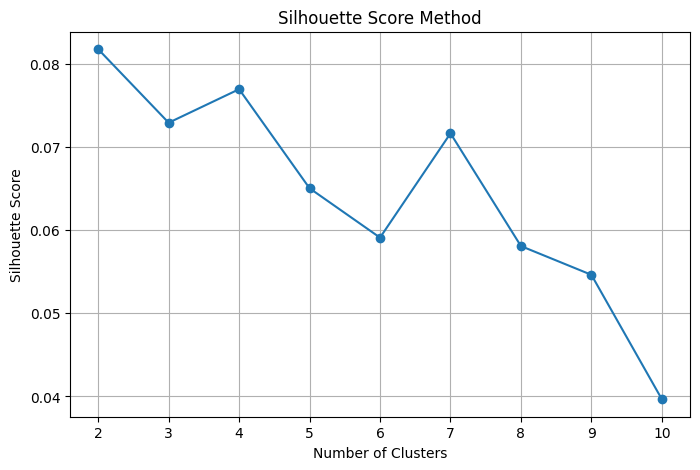

In [64]:
# Evaluasi Elbow Method
def evaluate_elbow_method(data, max_clusters=10):
    distortions = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)  # Inertia sebagai metric evaluasi
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters+1), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion (Inertia)')
    plt.xticks(range(2, max_clusters+1))
    plt.grid()
    plt.show()

# Evaluasi Silhouette Score
def evaluate_silhouette_score(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        score = silhouette_score(data, cluster_labels)
        silhouette_scores.append(score)
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.title('Silhouette Score Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, max_clusters+1))
    plt.grid()
    plt.show()

# Panggil fungsi evaluasi
print("Evaluating Elbow Method...")
evaluate_elbow_method(final_data_cleaned)

print("Evaluating Silhouette Score...")
evaluate_silhouette_score(final_data_cleaned)

cluster optimal = 6

## **c. Feature Selection**

In [65]:
# Random Forest untuk menghitung importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(final_data_cleaned[selected_numerical_features], cluster_labels)

# Menampilkan kepentingan fitur
importances = rf_model.feature_importances_
feature_importance = dict(zip(selected_numerical_features, importances))
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Feature Importance (Random Forest):")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

# Pilih fitur berdasarkan threshold importance (opsional)
threshold = 0.1  # Contoh: threshold importance minimum
selected_features_rf = [feature for feature, importance in sorted_features if importance >= threshold]
print("\nSelected Features based on Threshold:")
print(selected_features_rf)

Feature Importance (Random Forest):
AccountBalance: 0.4079
CustomerAge: 0.3842
TransactionAmount: 0.2079

Selected Features based on Threshold:
['AccountBalance', 'CustomerAge', 'TransactionAmount']


## **d. Visualisasi Hasil Clustering**

In [66]:
# 1. Impute fitur numerik dengan rata-rata
# Define numerical_data_selected before using it
numerical_data_selected = final_data_cleaned[['CustomerAge', 'AccountBalance', 'TransactionAmount']] # Assuming these are your desired numerical features

num_imputer = SimpleImputer(strategy='mean')
numerical_data_selected_imputed = pd.DataFrame(
    num_imputer.fit_transform(numerical_data_selected),
    columns=numerical_data_selected.columns
)

# 2. Impute fitur kategorikal dengan nilai yang paling sering muncul
# Define kategorial_data_selected before using it
kategorial_data_selected = final_data_cleaned[[col for col in final_data_cleaned.columns if col not in numerical_data_selected.columns]]  # Assuming these are your desired categorical features

cat_imputer = SimpleImputer(strategy='most_frequent')
kategorial_data_selected_imputed = pd.DataFrame(
    cat_imputer.fit_transform(kategorial_data_selected),
    columns=kategorial_data_selected.columns
)

# 3. Gabungkan data numerik dan kategorikal yang sudah diimpute
combined_data_selected = pd.concat([numerical_data_selected_imputed, kategorial_data_selected_imputed], axis=1)

# 4. Lakukan clustering ulang dengan fitur terpilih
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(combined_data_selected)

# 5. Menghitung jarak ke centroid terdekat dengan fitur terpilih
distances = np.linalg.norm(kmeans.transform(combined_data_selected), axis=1)

# 6. Menentukan threshold untuk deteksi fraud
# Gunakan threshold berbasis rata-rata + 3 * deviasi standar jarak ke centroid
threshold = distances.mean() + 3 * distances.std()

# 7. Create a new DataFrame for the results to avoid mismatched lengths
results_df = combined_data_selected.copy()  # Or use a more relevant name

# Assign 'Fraud', 'Cluster', and 'DistanceToCentroid' to the results DataFrame
results_df['Fraud'] = distances > threshold
results_df['Cluster'] = kmeans_labels
results_df['DistanceToCentroid'] = distances

# 9 Print ringkasan hasil deteksi fraud
total_fraud_points = results_df['Fraud'].sum()
print(f"Total Fraudulent Transactions Detected: {total_fraud_points}")

Total Fraudulent Transactions Detected: 60


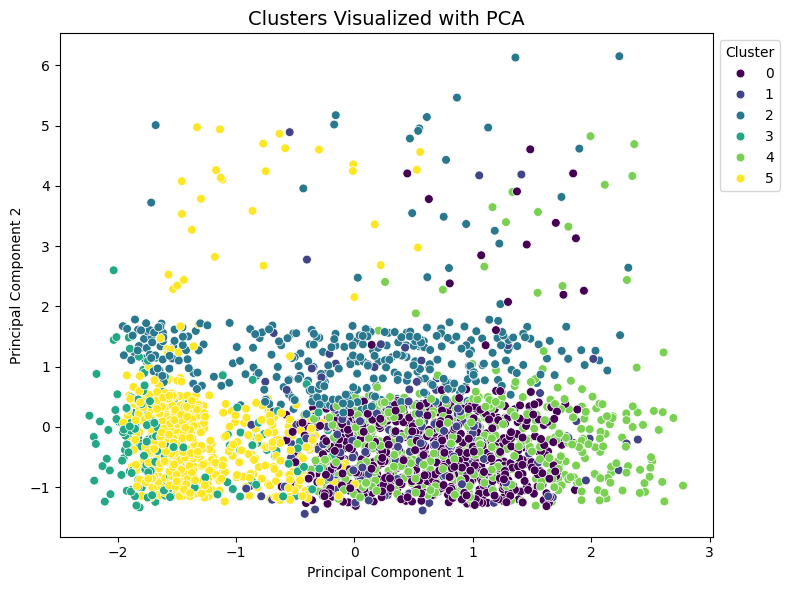

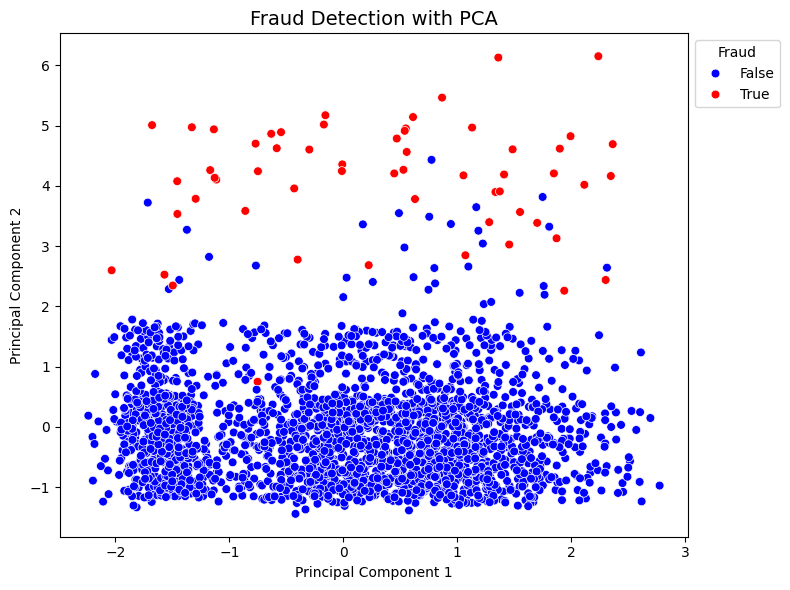

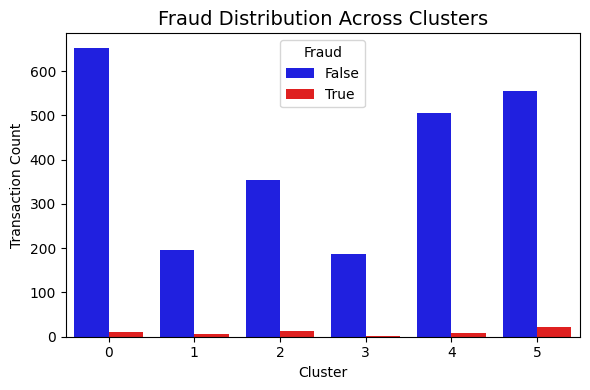

In [67]:
# Mereduksi dimensi ke 2 komponen utama
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_data_selected)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = results_df['Cluster']
pca_df['Fraud'] = results_df['Fraud']

# Visualisasi Cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=40)
plt.title('Clusters Visualized with PCA', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualisasi transaksi fraud
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Fraud',
                palette={True: 'red', False: 'blue'}, s=40)
plt.title('Fraud Detection with PCA', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Fraud', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Distribusi fraud di setiap cluster
plt.figure(figsize=(6, 4))
sns.countplot(data=pca_df, x='Cluster', hue='Fraud',
              palette={True: 'red', False: 'blue'})
plt.title('Fraud Distribution Across Clusters', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

#Menyimpan dataset hasil clusterin dan fraud detection
pca_df.to_csv('pca_df.csv', index=False)

Hasil analisis clustering menunjukkan adanya deteksi 60 titik cluster yang diklasifikasikan sebagai indikasi kecurangan (fraud) ketika data dibagi menjadi enam kelompok atau cluster. Berikut narasi yang menjelaskan visualisasi diatas:
1. Fraud Distribution Across Clusters
Cluster 0, 4, dan 5 didominasi oleh transaksi non-fraud, sementara Cluster 1, 2, dan 3 memiliki lebih sedikit transaksi secara keseluruhan. Kasus fraud tersebar merata, namun tetap lebih kecil dibandingkan transaksi non-fraud.

2. Fraud Detection with PCA
Data fraud (merah) cenderung terpisah di bagian atas grafik, sedangkan data non-fraud (biru) terkonsentrasi di bagian bawah.

3. Clusters Visualized with PCA
Cluster 0 dan 4 menunjukkan konsentrasi data yang lebih padat, sementara Cluster 1, 2, dan 3 lebih tersebar. Cluster 5 serupa dengan Cluster 0 namun lebih menyebar ke wilayah atas.

## **e. Analisis dan Interpretasi Hasil Cluster**

<ipython-input-68-723d416eb42b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


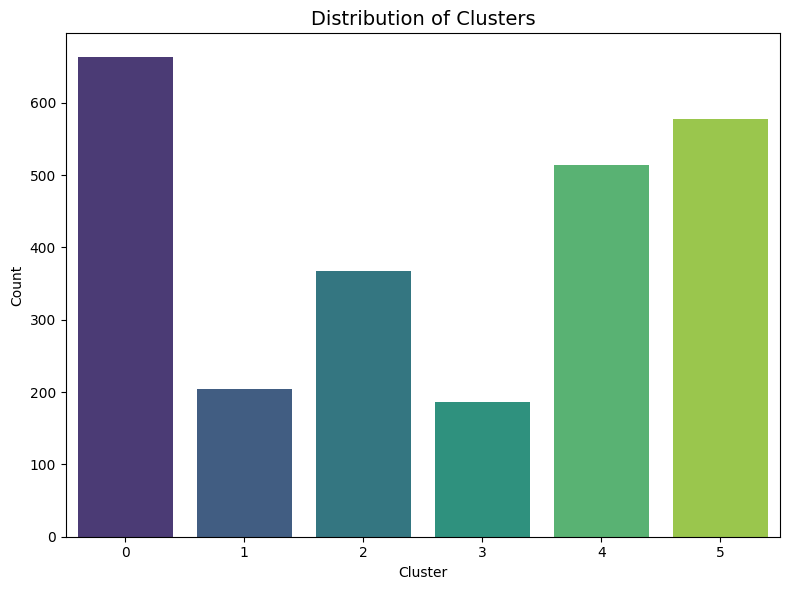

Distribution of Clusters:
Cluster
0    663
1    204
2    367
3    187
4    514
5    577
Name: count, dtype: int64


In [68]:
#Menghitung jumlah data di setiap cluster
cluster_counts = pca_df['Cluster'].value_counts().sort_index()

#Visualisasi distribusi cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Distribution of Clusters', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

#Menampilkan dsitribusi dalam bentuk tabel
print("Distribution of Clusters:")
print(cluster_counts)

Hasil distribusi tiap kluster menunjukkan bahwa
1. Cluster memiliki jumlah data terbanyak, yaitu sebanyak 663 transaksi. Hal ini menunjukkan bahwa cluster ini mendominasi distribusi data.
2. Cluster 1 memiliki jumlah data terendah dengan hanya 204 transaksi, menjadikannya cluster dengan data paling sedikit.
3. Cluster 2, 4, dan 5 memiliki jumlah data yang cukup signifikan, masing-masing sebanyak 367, 514, dan 577 transaksi. Ini menunjukkan bahwa data cukup tersebar merata di antara beberapa cluster selain Cluster 1.
4. Cluster 3 memiliki 187 transaksi, menjadikannya cluster dengan jumlah data hampir serupa dengan Cluster 1, namun tetap lebih kecil dibanding cluster lainnya.

Fraud Proportion in Each Cluster:
   Cluster  Fraud Proportion
0        0          0.015083
1        1          0.034314
2        2          0.035422
3        3          0.005348
4        4          0.015564
5        5          0.036395


<ipython-input-69-78550bed08ee>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Fraud Proportion', data=fraud_distribution, palette='viridis')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

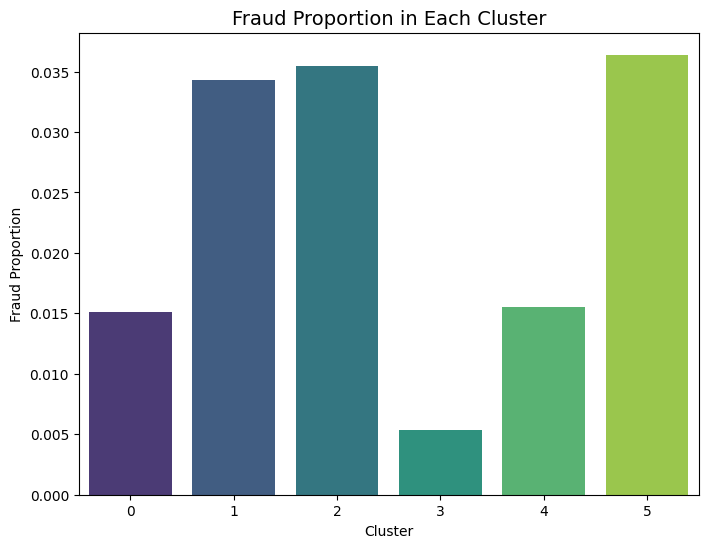

In [69]:
#Menghitung proporsi fraud disetiap cluster
fraud_distribution = pca_df.groupby('Cluster')['Fraud'].mean().reset_index()
fraud_distribution.columns = ['Cluster', 'Fraud Proportion']

#Menampilkan hasil
print("Fraud Proportion in Each Cluster:")
print(fraud_distribution)

#Visualisasi proporsi fraud per cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Fraud Proportion', data=fraud_distribution, palette='viridis')
plt.title('Fraud Proportion in Each Cluster', fontsize=14)
plt.xlabel('Cluster')

Berdasarkan hasil proporsi fraud di setiap cluster, berikut adalah interpretasinya:
1. **Cluster rentan fraud:** Cluster 5 memiliki proporsi fraud tertinggi (3.64%), diikuti oleh Cluster 2 (3.54%) dan Cluster 1 (3.43%). Fokuskan pengawasan pada cluster ini untuk mitigasi risiko.

2. **Cluster aman:** Cluster 3 memiliki proporsi fraud terendah (0.53%), menunjukkan risiko fraud yang minimal.

3. **Relevansi bisnis:** Pola distribusi fraud dapat dimanfaatkan untuk memperkuat pengawasan pada cluster dengan risiko tinggi dan mengoptimalkan strategi keamanan.

# **7. Mengeksport Data**

In [70]:
#Menyimpan dataset hasil clusterin dan fraud detection
pca_df.to_csv('data_cluster', index=False)